# Aprendizaje no Automático
* Sistemas expertos, por ejemplo los _score cards_ usados para otorgar créditos antes de uso masivo de las computadoras.
* Para esta semana, analizaremos las técnicas de aprendizaje computacional desde la perspectiva del riesgo crediticio.
* Aprenderemos a crear un clasificador de riesgo crediticio, que **aprenda** a otorgar una calificación dado que recibe cierta información de un cliente.

Tomemos por ejemplo los datos de [https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)](https://archive.ics.uci.edu/ml/datasets/Statlog+\(German+Credit+Data\)).  Exploremos su contenido:


In [1]:
!head data/german.data

A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 22 A143 A152 1 A173 1 A191 A201 2
A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 49 A143 A152 1 A172 2 A191 A201 1
A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 45 A143 A153 1 A173 2 A191 A201 1
A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 53 A143 A153 2 A173 2 A191 A201 2
A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 35 A143 A153 1 A172 2 A192 A201 1
A14 24 A32 A42 2835 A63 A75 3 A93 A101 4 A122 53 A143 A152 1 A173 1 A191 A201 1
A12 36 A32 A41 6948 A61 A73 2 A93 A101 2 A123 35 A143 A151 1 A174 1 A192 A201 1
A14 12 A32 A43 3059 A64 A74 2 A91 A101 4 A121 61 A143 A152 1 A172 1 A191 A201 1
A12 30 A34 A40 5234 A61 A71 4 A94 A101 2 A123 28 A143 A152 2 A174 1 A191 A201 2


* ¿Qué significan todas estas claves?
* ¿Qué hacemos cuando tenemos este tipo de datos?
* ¿Se pueden usar histogramas?

La descripción de los datos viene en el archivo `data/german.doc`

In [2]:
!head data/german.doc

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  


**Por favor, leánla en detalle al finalizar la sesión.**

## Score cards  
**¿Cómo comenzamos a usar la información contenida en los datos?**  
* Necesitamos saber qué significa cada columna,  
* Ponerlos en un formato analizable,  
* Comenzar a hacer algunos histogramas,  

**Por ahora yo hice un trabajo previo para ponerles nombres a las columnas, y estructurarlos de forma que no sean útiles. Es tarea para ustedes hacer su propio script que tome el archivo original y lo convierta en en un archivo similar al siguiente:**

In [3]:
!head data/german.data.all-numeric.csv

"checking_acc_numeric","time_credit_acc","credit_history_numeric","purpose_numeric","amount","savings_acc_numeric","p_employment_time_numeric","installment_rate","marita_status_sex_numeric","other_debtors_numeric","p_residence_time","property_numeric","age","other_installment_numeric","housing_numeric","number_of_credits","job_numeric","dependants","has_phone_numeric","foreign_worker_numeric","is_good"
1,6,3,1,1169,0,5,4,1,1,4,4,67,0,1,2,3,1,1,1,1
2,48,4,1,5951,1,3,2,2,1,2,4,22,0,1,1,3,1,0,1,2
4,12,3,6,2096,1,4,2,1,1,3,4,49,0,1,1,2,2,0,1,1
1,42,4,3,7882,1,4,2,1,2,4,3,45,0,0,1,3,2,0,1,1
1,24,2,2,4870,1,3,3,1,1,4,0,53,0,0,2,3,2,0,1,2
4,36,4,6,9055,0,3,2,1,1,4,0,35,0,0,1,2,2,1,1,1
4,24,4,3,2835,3,5,3,1,1,4,3,53,0,1,1,3,1,0,1,1
2,36,4,4,6948,1,3,2,1,1,2,2,35,0,2,1,4,1,1,1,1
4,12,4,1,3059,4,4,2,4,1,4,4,61,0,1,1,2,1,0,1,1


Por supuesto, ustedes prefieren usar `pandas` para visualizarlos. 

In [4]:
from pandas import read_csv as read_csv, DataFrame
df = read_csv('data/german.data.all-numeric.csv',header=0)
df.head(n=10)

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,property_numeric,age,other_installment_numeric,housing_numeric,number_of_credits,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good
0,1,6,3,1,1169,0,5,4,1,1,...,4,67,0,1,2,3,1,1,1,1
1,2,48,4,1,5951,1,3,2,2,1,...,4,22,0,1,1,3,1,0,1,2
2,4,12,3,6,2096,1,4,2,1,1,...,4,49,0,1,1,2,2,0,1,1
3,1,42,4,3,7882,1,4,2,1,2,...,3,45,0,0,1,3,2,0,1,1
4,1,24,2,2,4870,1,3,3,1,1,...,0,53,0,0,2,3,2,0,1,2
5,4,36,4,6,9055,0,3,2,1,1,...,0,35,0,0,1,2,2,1,1,1
6,4,24,4,3,2835,3,5,3,1,1,...,3,53,0,1,1,3,1,0,1,1
7,2,36,4,4,6948,1,3,2,1,1,...,2,35,0,2,1,4,1,1,1,1
8,4,12,4,1,3059,4,4,2,4,1,...,4,61,0,1,1,2,1,0,1,1
9,2,30,3,2,5234,1,1,4,3,1,...,2,28,0,1,2,4,1,0,1,2


In [5]:
df.describe()

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,property_numeric,age,other_installment_numeric,housing_numeric,number_of_credits,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,3.224000,2.975000,3271.258000,1.190000,3.384000,2.973000,1.644000,1.134000,...,2.488000,35.546000,0.325000,1.071000,1.407000,2.904000,1.155000,0.404000,0.963000,1.300000
std,1.257638,12.058814,1.060636,2.081035,2822.736876,0.966869,1.208306,1.118715,0.844972,0.445244,...,1.318937,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.000000,1.000000,250.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,12.000000,3.000000,1.000000,1365.500000,1.000000,3.000000,2.000000,1.000000,1.000000,...,2.000000,27.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,18.000000,4.000000,2.000000,2319.500000,1.000000,3.000000,3.000000,1.000000,1.000000,...,3.000000,33.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
75%,4.000000,24.000000,4.000000,4.000000,3972.250000,1.000000,5.000000,4.000000,2.000000,1.000000,...,4.000000,42.000000,0.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,4.000000,72.000000,4.000000,11.000000,18424.000000,4.000000,5.000000,4.000000,4.000000,3.000000,...,4.000000,75.000000,2.000000,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,2.000000


En este caso se tienen 20 columnas de características o discriminadores (_features_), y una columna de salida o clasificación. Tomemos sólo 4 de las 20 características para ilustrar el proceso de creación de un _score card_. En este caso tomaremos:  
* `time_credit_acc`
* `amount`
* `p_employment_time_numeric`
* `age`  
También debemos dividir nuestra muestra en dos secciones, una que no servirá para ***entrenar*** nuestro modelo; y otra que nos servira para ***evaluar*** su desempeño. En este caso tomamos aleatoriamente el 70% de la mustra original para entrenamiento, y dejamos el 30% restante para evaluación.

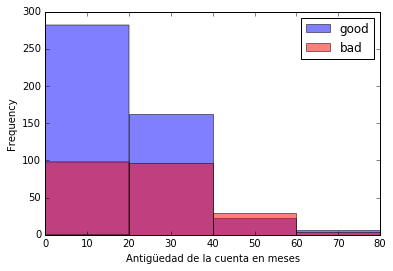

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure();
tca_range = range(0,100,20)
df_trainning = df.sample(frac=0.7, replace=False)
df_testing = df.drop(df_trainning.index)
df_good = df_trainning[df_trainning['is_good']==1] 
df_bad = df_trainning[df_trainning['is_good']!=1]
df_good['time_credit_acc'].plot.hist(bins=tca_range,color='b',alpha=0.5,label='good')
df_bad['time_credit_acc'].plot.hist(bins=tca_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper right')
plt.xlabel('Antigüedad de la cuenta en meses')

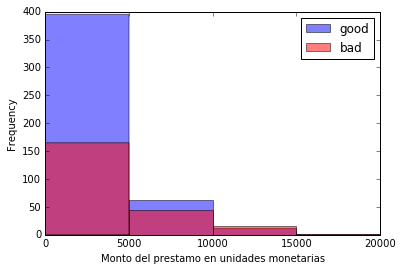

In [7]:
plt.figure();
tca_range = range(0,25000,5000)
df_good['amount'].plot.hist(bins=tca_range,color='b',alpha=0.5,label='good')
df_bad['amount'].plot.hist(bins=tca_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper right')
plt.xlabel('Monto del prestamo en unidades monetarias')

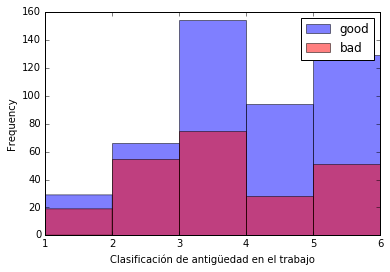

In [8]:
plt.figure();
tca_range = range(1,7,1)
df_good['p_employment_time_numeric'].plot.hist(bins=tca_range,color='b',alpha=0.5,label='good')
df_bad['p_employment_time_numeric'].plot.hist(bins=tca_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper right')
plt.xlabel('Clasificación de antigüedad en el trabajo')

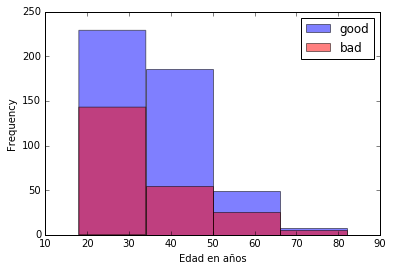

In [9]:
plt.figure();
tca_range = range(18,88,16)
df_good['age'].plot.hist(bins=tca_range,color='b',alpha=0.5,label='good')
df_bad['age'].plot.hist(bins=tca_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper right')
plt.xlabel('Edad en años')

### Creando el _score card_

Para crear un _score card_ debemos segmentar las variables de interés en unpos pocos grupos, **3** o **4**, por ejemplo, y a cada grupo asignarle una calificación ***intuitiva***, respetando que las calificaciones mayores significan menor riesgo (o mayor, sgún nos guste).

| TCA  | Score |Amount| Score | PET  | Score | Age  | Score |
|------|-------|------|-------|------|-------|------|-------|
| 0-20 |   7   | 0-5K |   7   |   1  |    1  | 18-34|   3   |
|20-40 |   3   | 5-10K|   1   |   2  |    1  | 34-50|   5   |
|40-60 |   0   |10-15K|   0   |   3  |    6  | 50-66|   3   |
|60-80 |   0   |15-20K|   0   |   4  |    8  | 66-83|   3   |
| ---- | ----- | ---- | ----- |   5  |    8  | ---- | ----- |

Por supuesto, queremos un programa que reciba la información de uno o varios clientes y nos devuelva la calificación que debería recibir según nuestro **primer modelo de clasificación**. Veamos su desempeño.  
En el directorio de esta semana, se encuentra el archivo `score_card.py`, es una implementación de la tabla que describe nuestro _score card_. Ahora debemos evaluar su desempeño. Para hacerlo, usamos la muestra de prueba que seleccionamos anteriormente.
Para ejecutar nuestro programa, y evaluar un cliente, simplemente ejecutamos:

In [10]:
!./score_card.py --tca=1 --amount=2000 --pet=4 --age=36

27


Ahora, debemos usar nuestro script para evaluar a cada uno de nuestros clientes en la muestra de prueba.

In [11]:
df_testing.describe()

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,property_numeric,age,other_installment_numeric,housing_numeric,number_of_credits,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.543333,20.326667,3.323333,2.990000,3047.806667,1.236667,3.396667,2.943333,1.613333,1.156667,...,2.56000,35.856667,0.340000,1.033333,1.406667,2.866667,1.196667,0.400000,0.946667,1.240000
std,1.227386,12.025056,0.977398,2.105074,2613.472717,0.995301,1.162106,1.121449,0.816114,0.468530,...,1.35617,11.468561,0.729961,0.528982,0.579432,0.645713,0.398142,0.490716,0.225073,0.427797
min,1.000000,4.000000,0.000000,1.000000,250.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,20.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,12.000000,3.000000,1.000000,1288.750000,1.000000,3.000000,2.000000,1.000000,1.000000,...,2.00000,27.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,18.000000,4.000000,2.000000,2209.000000,1.000000,3.000000,3.000000,1.000000,1.000000,...,3.00000,34.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
75%,4.000000,24.000000,4.000000,4.000000,3907.000000,1.000000,4.000000,4.000000,2.000000,1.000000,...,4.00000,42.000000,0.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,72.000000,4.000000,11.000000,18424.000000,4.000000,5.000000,4.000000,4.000000,3.000000,...,4.00000,74.000000,2.000000,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,2.000000
